In [2]:
import glob
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
from PIL import Image
import typing

In [3]:
ITEM_ALTARS_PATH = "../data/derived_data/item_altars/"
ITEMS_PATH = "../data/original_data/items/"
FLOORS_PATH = "../data/original_data/floors/"

OUTPUT_PATH = "../data/derived_data/items_with_floor/"

if not os.path.exists(OUTPUT_PATH):
    os.makedirs(OUTPUT_PATH)

In [4]:
def show_image(image: np.array):
    plt.imshow(image)
    plt.show()

def load_image(image_path: str, mode="RGBA", return_arr=True) -> np.array:
    img = Image.open(image_path).convert(mode)

    if return_arr:
        return np.array(img)
    
    return img

def resize_image(image: np.array, fx : int = 4, fy : int = 4):
    # To maintain proportion with floors fx and fy must be set to 4
    img_resized = cv2.resize(image, None, fx=fx, fy=fy, interpolation=cv2.INTER_NEAREST)

    return img_resized

def combine_item_with_altar(item: np.array, output_img_shape=None):
    altar = load_image(f"{ITEM_ALTARS_PATH}/item_altar_001.png")

    if not output_img_shape:
        output_img_shape = (item.shape[0] + altar.shape[0], 32, 4)

    img_combined = np.zeros(shape=output_img_shape)
    img_combined[-23:, 2:29, :] = altar

    img_combined[-output_img_shape[0]:-altar.shape[0], :, :] = item

    return img_combined

def combine_item_with_floor(item : np.array, floor_filename : str = "01_basement.png", pos : tuple[int, int] = (0,0)):
    item = Image.fromarray(item, "RGBA")

    floor = load_image(FLOORS_PATH + floor_filename)
    floor = Image.fromarray(resize_image(floor[55:155, 55:150, :]).astype(np.uint8))
    # floor = Image.fromarray(resize_image(floor).astype(np.uint8))

    floor.paste(item, pos, item)

    return floor.convert("RGB")



In [7]:
images = sorted(glob.glob(ITEMS_PATH + "*"))

for item_num, img_path in enumerate(images):

    item_name = img_path.split("/")[-1][:-4]
    item_name = item_name.lower()
    item_name = item_name.replace(" ", "_")
    item_name = f"{item_num}_{item_name}"

    if "Seraphim" in img_path:
        item_arr = np.full((32,32,4), 255)
        item_arr[:,:,-1] = 0
        item_arr[4:-4, 1:-1, :] = load_image(img_path)
    else:
        item_arr = load_image(img_path)

    item_w_altar = combine_item_with_altar(item_arr)
    item_w_altar = resize_image(item_w_altar)
    item_w_altar = item_w_altar.astype(np.uint8)

    derived_img = combine_item_with_floor(item_w_altar, pos=(125,80))
    # derived_img
    # show_image(derived_img.crop((120,80,250,230)))
    # derived_img = derived_img.crop((120,80,250,230))
    derived_img.save(f"{OUTPUT_PATH}/{item_name}.png")
    # break

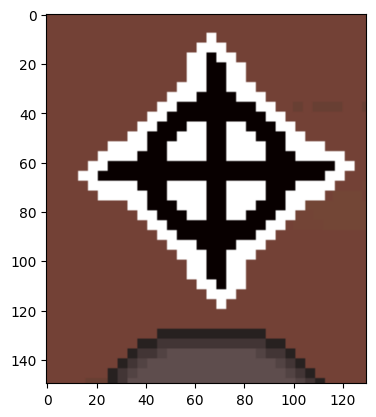

In [6]:
show_image(derived_img)